**Download Dataset**
*   https://www.kaggle.com/fredericobreno/play-tennis



**Import Library and Load Dataset**

In [0]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load data
df = pd.read_csv("../content/drive/My Drive/play_tennis.csv")

**Exploratory Data Analysis**

In [159]:
# Dataset Review
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [160]:
# Number of rows and columns
print(df.shape)

(14, 6)


In [161]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
day         14 non-null object
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
wind        14 non-null object
play        14 non-null object
dtypes: object(6)
memory usage: 800.0+ bytes


In [162]:
# Check null data
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

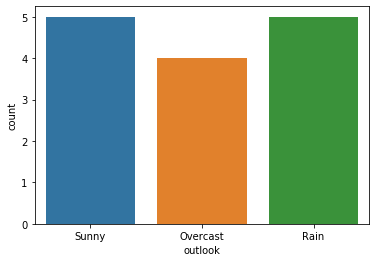

In [163]:
# Histogram Plot
df.groupby(['outlook']).size()
sns.countplot(df['outlook'])

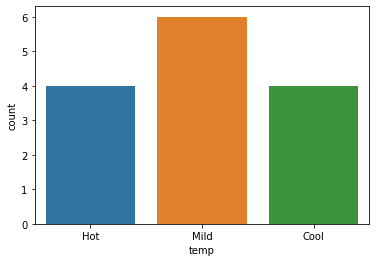

In [164]:
df.groupby(['temp']).size()
sns.countplot(df['temp'])

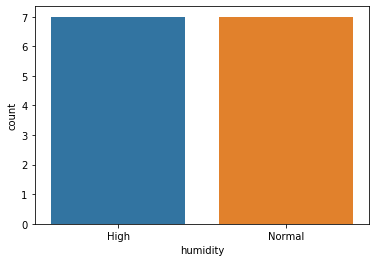

In [165]:
df.groupby(['humidity']).size()
sns.countplot(df['humidity'])

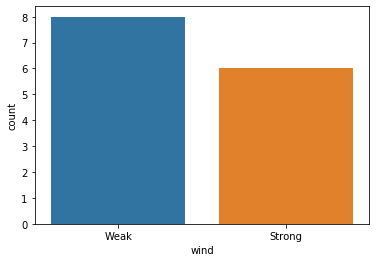

In [166]:
df.groupby(['wind']).size()
sns.countplot(df['wind'])

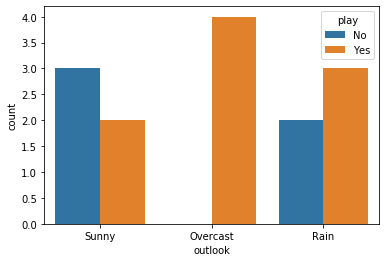

In [167]:
pd.crosstab(index=df.outlook, columns=df.play)
sns.countplot("outlook", hue="play", data=df)

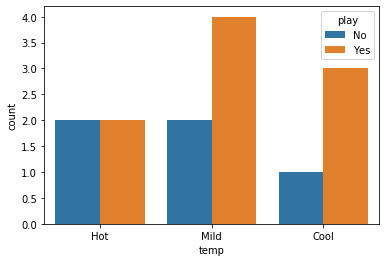

In [168]:
pd.crosstab(index=df.temp, columns=df.play)
sns.countplot("temp", hue="play", data=df)

play,No,Yes
humidity,,
High,4,3
Normal,1,6


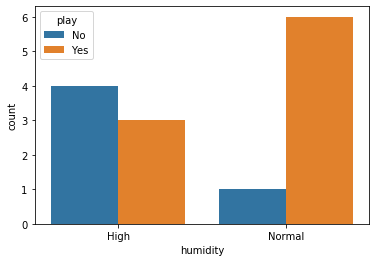

In [169]:
sns.countplot("humidity", hue="play", data=df)
pd.crosstab(index=df.humidity, columns=df.play)

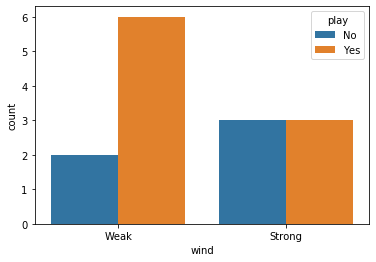

In [170]:
pd.crosstab(index=df.wind, columns=df.play)
sns.countplot("wind", hue="play", data=df)

**Model Training and Evaluation**



In [171]:
# Converts a categorical data into a number
number = LabelEncoder()
column = ['outlook','temp','humidity','wind','play']
for x in column:
  df[x]=number.fit_transform(df[x])

# Drop Column "day"
df = df.drop(['day'],axis=1)

# Check Dataset
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [0]:
# Split dataset
features = ['outlook','temp','humidity','wind']
target = "play"
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size = 0.3,random_state = 7)

In [173]:
# Create a Gaussian Classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

# Check Accuracy
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8


In [174]:
# Prediction (Sunny, Cool, High, Strong)
test=[[2,0,0,0]]
print("Prediction:",model.predict(test))

Prediction: [1]
